In [6]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
def expand(a, b):
    d = (b - a) * 0.05
    return a - d, b + d

In [8]:
data = np.loadtxt('../dataset/HeightWeight.csv', dtype=np.float, delimiter=',', skiprows=1)
print data.shape
y, x = np.split(data, [1, ], axis=1)
x, x_test, y, y_test = train_test_split(x, y, train_size=0.6, random_state=0)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)
gmm.fit(x)
print '均值 = \n', gmm.means_
print '方差 = \n', gmm.covariances_
y_hat = gmm.predict(x)
y_test_hat = gmm.predict(x_test)
change = (gmm.means_[0][0] > gmm.means_[1][0])
if change:
    z = y_hat == 0
    y_hat[z] = 1
    y_hat[~z] = 0
    z = y_test_hat == 0
    y_test_hat[z] = 1
    y_test_hat[~z] = 0
acc = np.mean(y_hat.ravel() == y.ravel())
acc_test = np.mean(y_test_hat.ravel() == y_test.ravel())
acc_str = u'训练集准确率：%.2f%%' % (acc * 100)
acc_test_str = u'测试集准确率：%.2f%%' % (acc_test * 100)
print acc_str
print acc_test_str

(114, 3)
均值 = 
[[ 160.13983374   55.93370575]
 [ 173.50243688   65.03359308]]
方差 = 
[[[  18.82128194   12.30370549]
  [  12.30370549   31.23596113]]

 [[  23.22794989   28.48688647]
  [  28.48688647  105.81824734]]]
训练集准确率：77.94%
测试集准确率：82.61%


[[  9.99997750e-01   2.25031842e-06]
 [  9.99997839e-01   2.16136597e-06]
 [  9.99997923e-01   2.07669097e-06]
 ..., 
 [  6.34944402e-11   1.00000000e+00]
 [  5.78303161e-11   1.00000000e+00]
 [  5.26521608e-11   1.00000000e+00]]


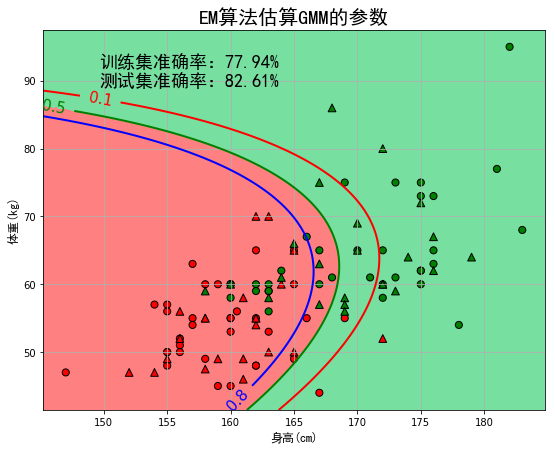

In [9]:
# 可以产生等值线
cm_light = mpl.colors.ListedColormap(['#FF8080', '#77E0A0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g'])
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = gmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
if change:
    z = grid_hat == 0
    grid_hat[z] = 1
    grid_hat[~z] = 0
plt.figure(figsize=(9, 7), facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=50, c=y, marker='o', cmap=cm_dark, edgecolors='k')
plt.scatter(x_test[:, 0], x_test[:, 1], s=60, c=y_test, marker='^', cmap=cm_dark, edgecolors='k')

p = gmm.predict_proba(grid_test)
print p
p = p[:, 0].reshape(x1.shape)
CS = plt.contour(x1, x2, p, levels=(0.1, 0.5, 0.8), colors=list('rgb'), linewidths=2)
plt.clabel(CS, fontsize=15, fmt='%.1f', inline=True)
ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
xx = 0.9 * ax1_min + 0.1 * ax1_max
yy = 0.1 * ax2_min + 0.9 * ax2_max
plt.text(xx, yy, acc_str, fontsize=18, fontproperties=fontproperties)
yy = 0.15 * ax2_min + 0.85 * ax2_max
plt.text(xx, yy, acc_test_str, fontsize=18, fontproperties=fontproperties)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.xlabel(u'身高(cm)', fontsize='large', fontproperties=fontproperties)
plt.ylabel(u'体重(kg)', fontsize='large', fontproperties=fontproperties)
plt.title(u'EM算法估算GMM的参数', fontsize=20, fontproperties=fontproperties)
plt.grid()
plt.show()